In [4]:
from quantopian.pipeline import Pipeline
from quantopian.research import run_pipeline
from quantopian.pipeline.filters.morningstar import Q1500US
from quantopian.pipeline.data.sentdex import sentiment
from quantopian.pipeline.data.morningstar import operation_ratios

def make_pipeline():
    testing_factor = operation_ratios.revenue_growth.latest
    universe = (Q1500US() & testing_factor.notnull())
    
    testing_factor = testing_factor.rank(mask = universe, method = 'average')
    pipe = Pipeline(columns = {'testing_factor':testing_factor},
                    screen = universe)
    
    return pipe

result = run_pipeline(make_pipeline(), start_date = '2015-01-01', end_date = '2016-01-01')
result.head()

testing_factor
2015-01-02 00:00:00+00:00 Equity(2 [HWM])             755.0
                          Equity(24 [AAPL])           946.0
                          Equity(41 [ARCB])          1003.0
                          Equity(62 [ABT])            597.0
                          Equity(67 [ADSK])           912.0

In [8]:
assets = result.index.levels[1].unique()
pricing = get_pricing(assets, start_date = '2014-12-01', end_date = '2016-02-01', fields = 'open_price')
len(assets)

9657

Dropped 5.0% entries from factor data: 5.0% in forward returns computation and 0.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 35.0%, not exceeded: OK!
Quantiles Statistics


,min,max,mean,std,count,count %
factor_quantile,,,,,,
1,1.0,754.0,373.587694,215.457413,179339,50.015757
2,737.0,1500.0,1119.637943,215.219511,179226,49.984243


Returns Analysis


,3D,10D,30D
Ann. alpha,0.061,0.057,0.049
beta,-0.007,-0.035,-0.016
Mean Period Wise Return Top Quantile (bps),5.080,4.941,4.726
Mean Period Wise Return Bottom Quantile (bps),-5.074,-4.943,-4.743
Mean Period Wise Spread (bps),10.154,9.884,9.469


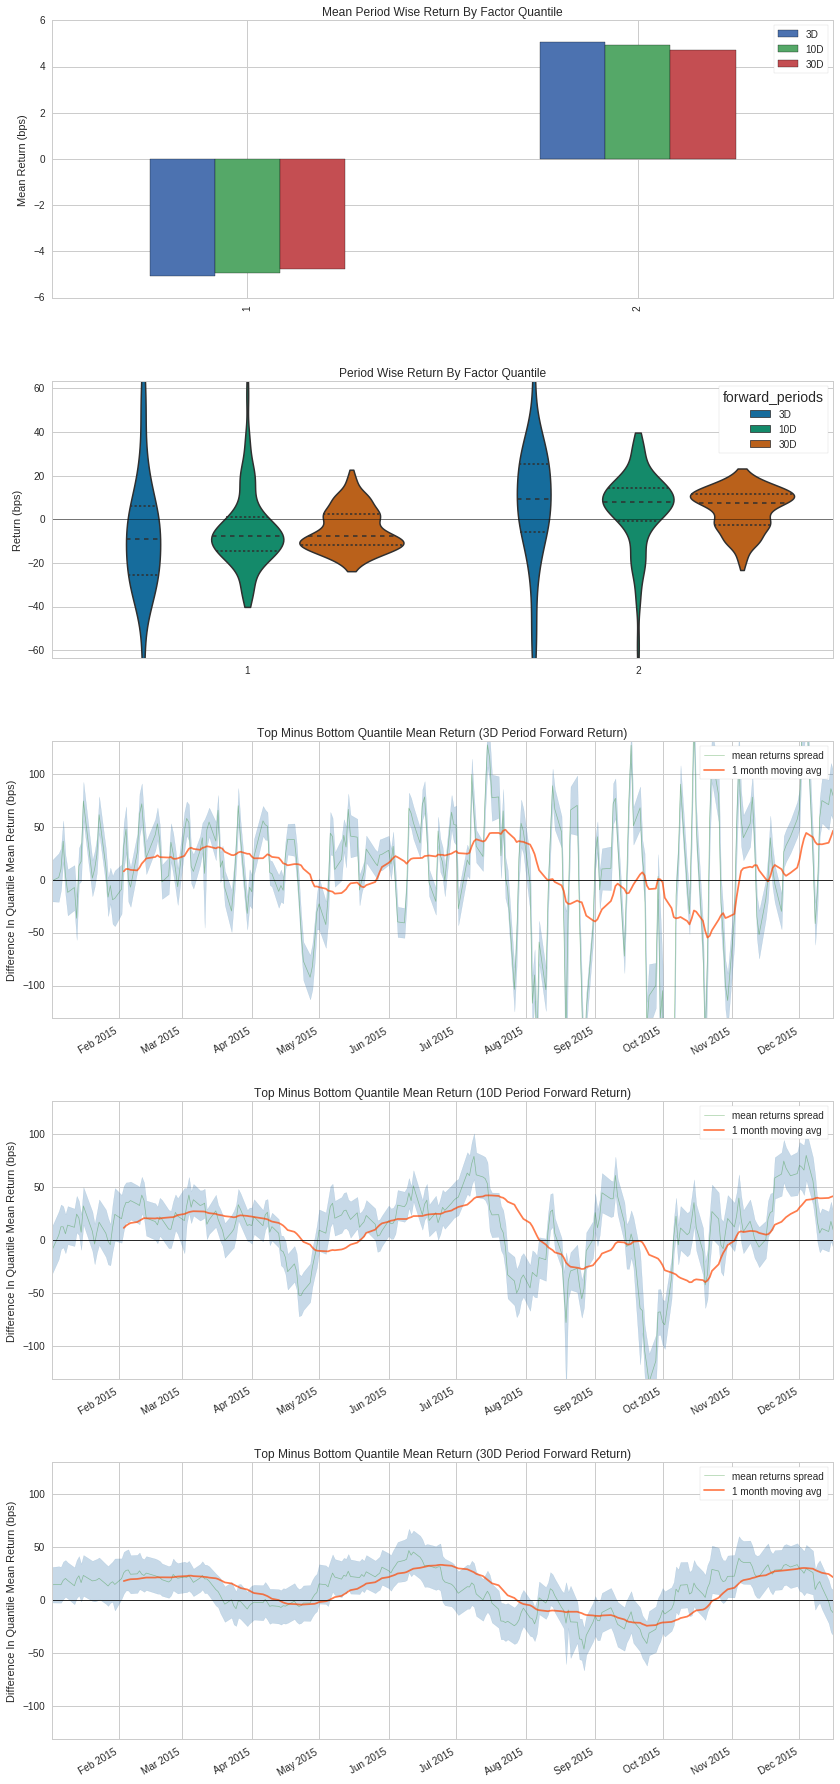

Information Analysis


,3D,10D,30D
IC Mean,0.030,0.042,0.047
IC Std.,0.109,0.114,0.111
Risk-Adjusted IC,0.278,0.366,0.428
t-stat(IC),4.331,5.686,6.654
p-value(IC),0.000,0.000,0.000
IC Skew,-0.575,-0.818,-0.441
IC Kurtosis,0.209,0.857,-0.630


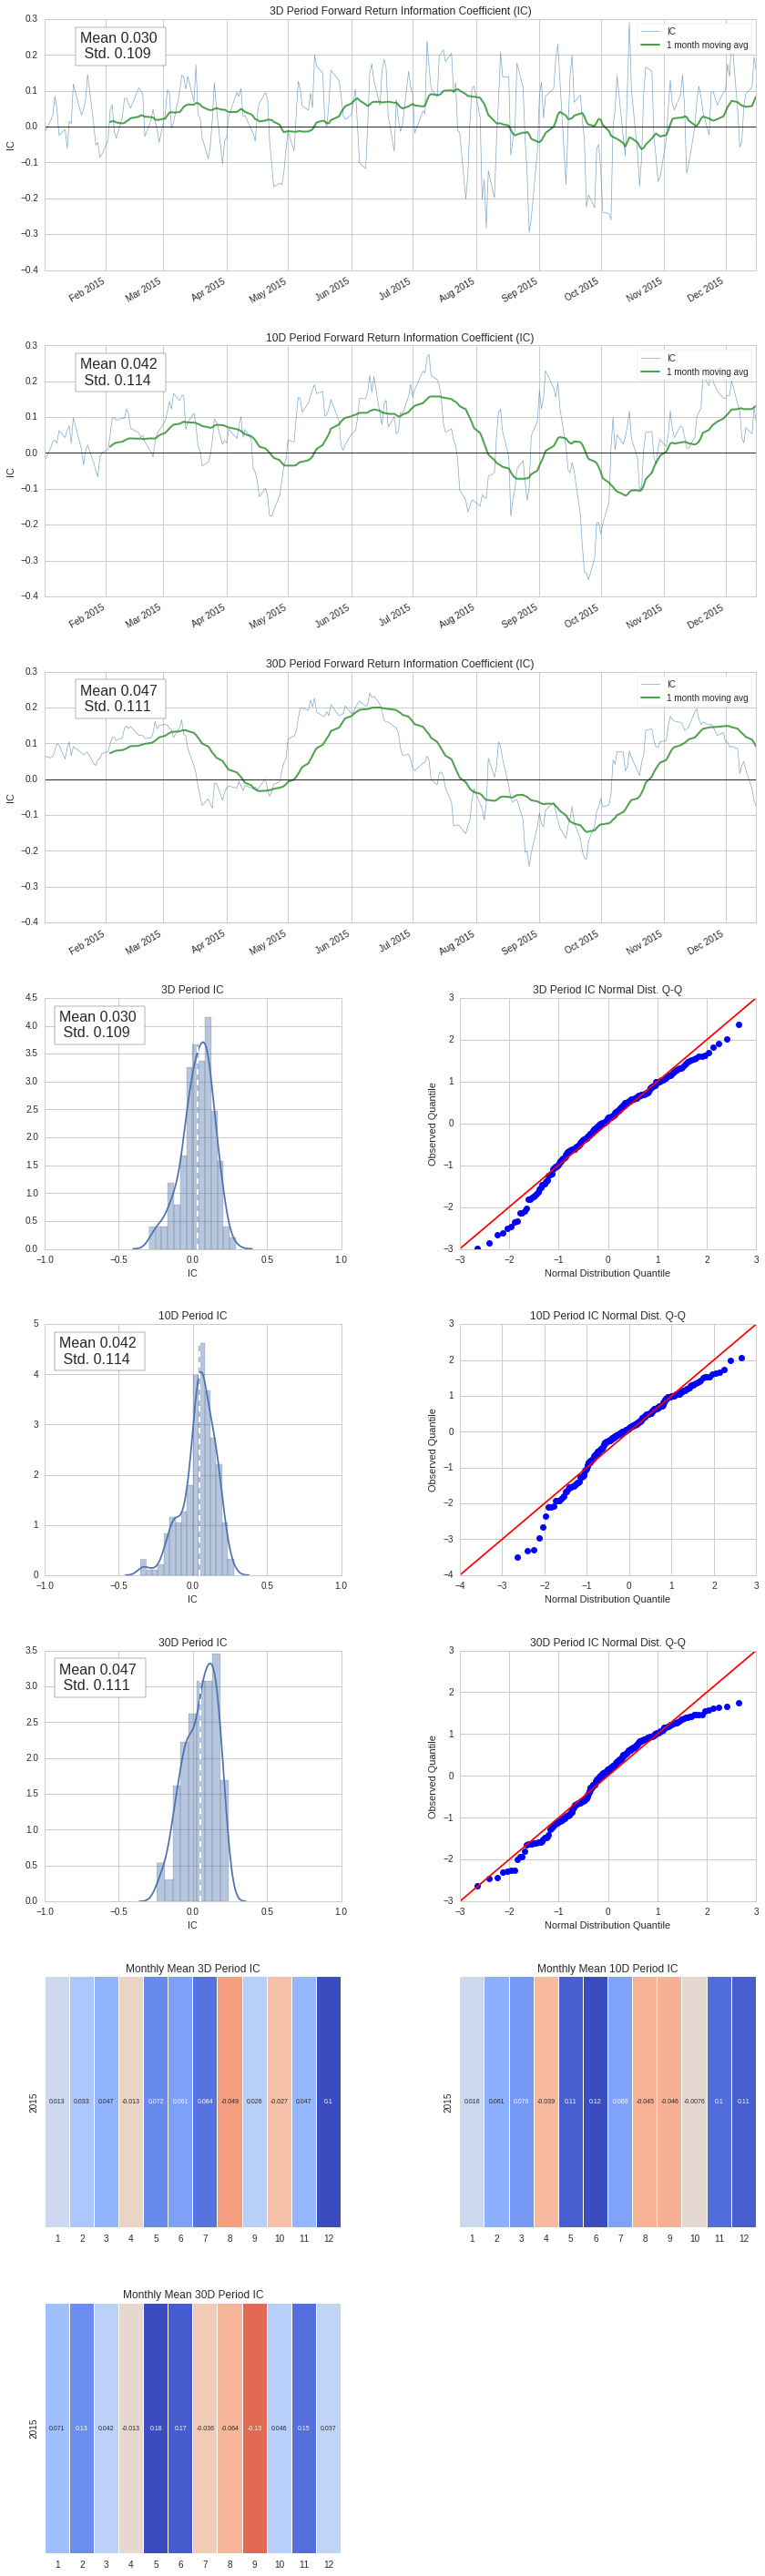

Turnover Analysis


,3D,10D,30D
Quantile 1 Mean Turnover,0.015,0.045,0.124
Quantile 2 Mean Turnover,0.015,0.045,0.126


,3D,10D,30D
Mean Factor Rank Autocorrelation,0.987,0.955,0.86


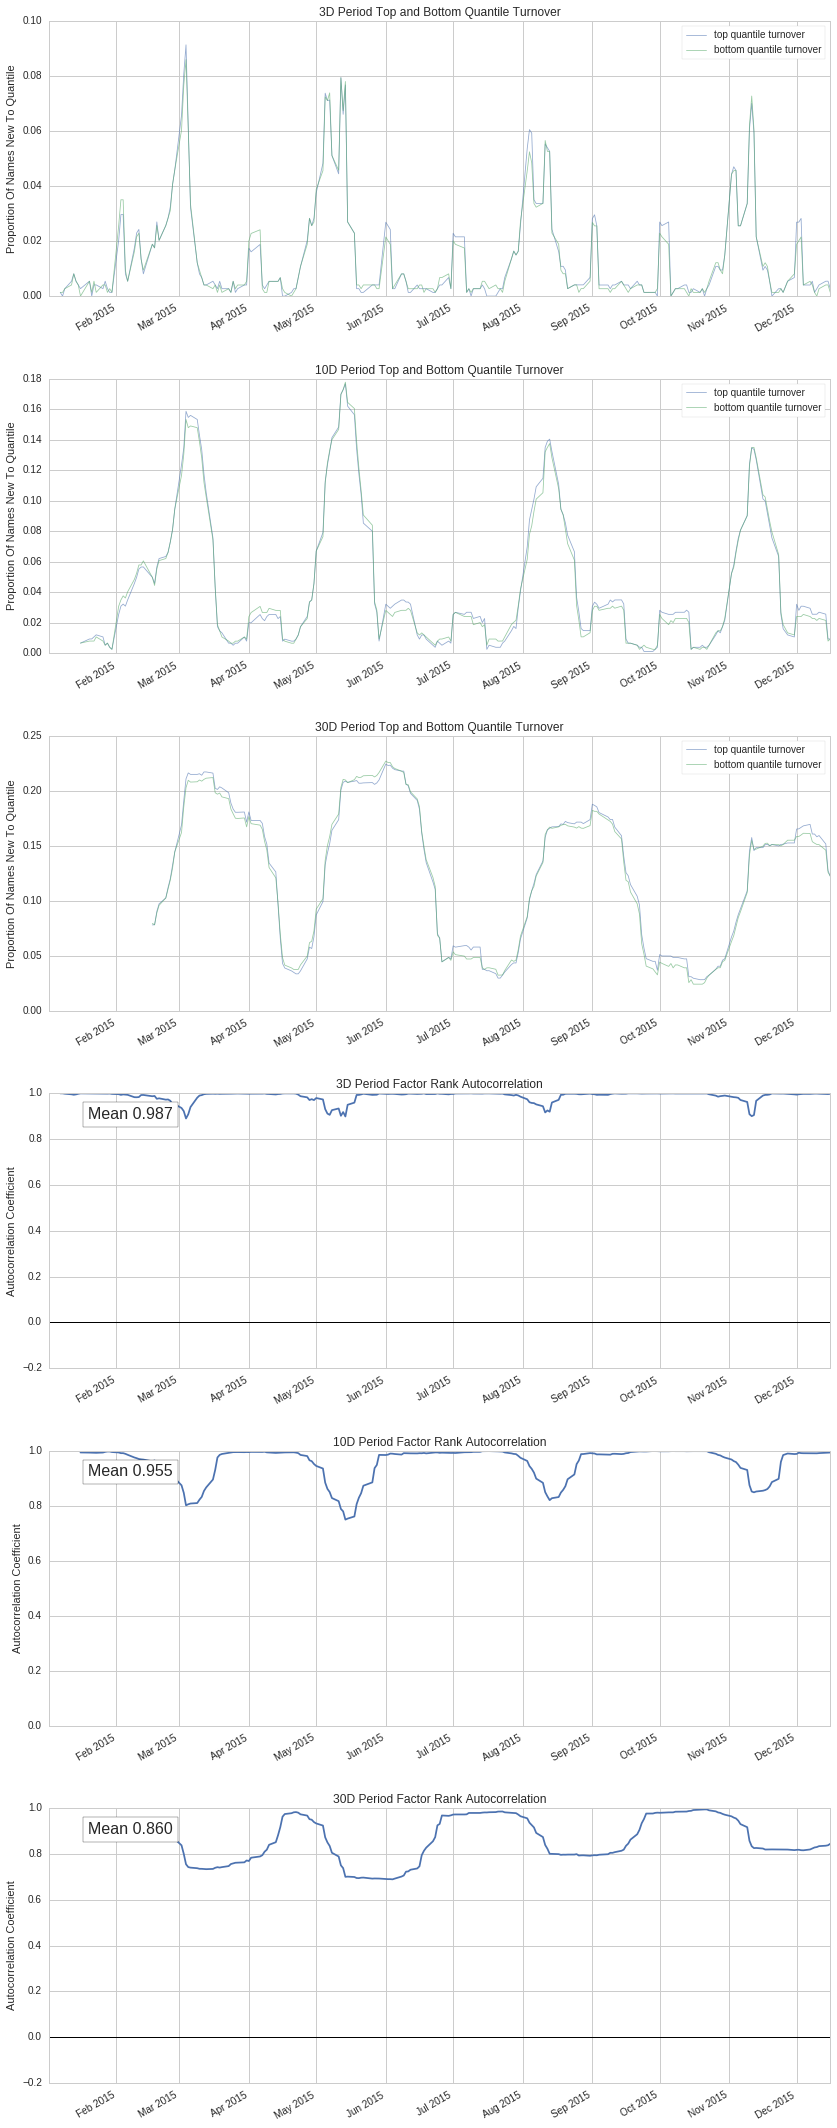

In [11]:
import alphalens

factor_data = alphalens.utils.get_clean_factor_and_forward_returns(factor = result['testing_factor'],
                                                                   prices = pricing,
                                                                   quantiles = 2,
                                                                   periods = (3,10,30))

alphalens.tears.create_full_tear_sheet(factor_data)

